# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [51]:
import pandas as pd
import numpy as np  
import array 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [52]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [53]:
df

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-34.567,-58.435,65000.000,22.000,20.000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,-34.586,-58.437,175000.000,62.000,58.000,3,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,-34.583,-58.422,95000.000,32.000,32.000,2,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,-34.576,-58.429,95900.000,77.000,22.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,-34.578,-58.413,159000.000,32.000,30.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 100)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [55]:
# En esta celda cargá el regresor y realizá el entrenamiento
regressor = DecisionTreeRegressor(random_state=0,max_depth=5)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [56]:
y_pred = regressor.predict(X_test)
print(y_pred)

[133869.23932088  99693.78343949 109591.27607362 ...  76092.36331325
 117103.87426407  99693.78343949]


4**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [57]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

498064673.33102685
22317.362598009353


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [70]:
#rmses_test = array.array(rmse)
rmses_test = []
rmses_train = []
for i in range (1,100,5):
    regressor = DecisionTreeRegressor(random_state=0,max_depth=i)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    rmses_train.extend([np.sqrt(metrics.mean_squared_error(y_train, y_train)).tolist()])
    rmses_test.extend([np.sqrt(metrics.mean_squared_error(y_test, y_pred)).tolist()])
    
    #df_filtered['barrio_publicado'] = df_filtered['place_with_parent_names'].apply( lambda x: x.split("|")[3].upper())
    

In [71]:
rmses_test

#print("Hola")
#rmses_train

[27069.52308311684,
 21935.58980437242,
 22546.389989107796,
 24586.392636204975,
 25609.65255678811,
 25517.615332866197,
 25389.706131493305,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438,
 25264.143667002438]

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

ValueError: x and y must have same first dimension, but have shapes (6,) and (19,)

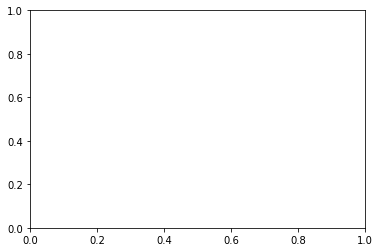

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [9]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda

knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

ValueError: Unknown label type: 'continuous'

In [ ]:
y_test

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [ ]:
# Calculá los cambio en el rmse en esta celda

In [ ]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [ ]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [ ]:
# Calculá en esta celda los cross_val_score
#cross_val_score(regressor, X_train, y_train, cv=10)

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [ ]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [ ]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [ ]:
predicciones.head(10)